In [2]:
from __future__ import print_function, division

# Images in Astronomy

In this lesson we are going to look at aspects of processing and viewing images specific to Astronomy and Solar Astronomy. By the end of this lesson you should understand:

* Projected Coordinate Systems in Images
* World Coordinate Systems
* Using WCS to calculate coordinates in images
* Plotting images with WCS in images
* Using SunPy Map

## Projected Coordinate Systems

When taking images of the sky, we are projecting the spherical celestial coordinate system onto a 2-dimensional plane, which means that there is no simple linear relation between pixel coordinates and celestial coordinates

There are multiple coordinate systems used to describe the locations in 2D and 3D space for both Astronomy and Solar Physics. We shall use a couple of these systems here as examples but if you want to know more about them there are many of resources avalible.

### World Coordinate System

The FITS files have a standard for describing the physical coordinate system associated with imaging data, this is called the world coordinate system or WCS, sometimes the specific FITS version of this is referred to as FITS-WCS.

There are multiple papers describing the FITS-WCS standard for various types of data, there is a list here: http://fits.gsfc.nasa.gov/fits_wcs.html

As you learned in the previous lesson we can load FITS files with Astropy. To demonstrate a simple example of a FITS file with FITS-WCS information in the header we shall use an image from SunPy:

In [3]:
from sunpy.data.sample import AIA_171_IMAGE
from astropy.io import fits

hdulist = fits.open(AIA_171_IMAGE)
hdulist.verify('silentfix')
for k, v in hdulist[0].header.items():
    print(k, v)

SIMPLE True
BITPIX 32
NAXIS 2
NAXIS1 1024
NAXIS2 1024
EXTEND True
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H
ORIGIN SDO/JSOC-SDP
DATE 2011-03-19T11:08:25
TELESCOP SDO/AIA
INSTRUME AIA_3
DATE-OBS 2011-03-19T10:54:00.34
T_OBS 2011-03-19T10:54:01.34Z
TOBSSTEP 90.0
TOBSEPOC 1977.01.01_00:00:00_TAI
CAMERA 3
IMG_TYPE LIGHT
EXPTIME 1.999601
EXPSDEV 0.00016
INT_TIME 2.273438
WAVELNTH 171
WAVEUNIT angstrom
WAVE_STR 171_THIN
FSN 22642033
FID 0
LVL_NUM 1.5
QUALLEV0 0
QUALITY 1073741824
TOTVALS 16777216
DATAVALS 16777216
MISSVALS 0
PERCENTD 100.0
DATAMIN -7
DATAMAX 16228
DATAMEDN 192
DATAMEAN 236.57
DATARMS 294.02
DATASKEW 4.63
DATAKURT 49.56
OSCNMEAN nan
OSCNRMS nan
FLAT_REC aia.flatfield[:#7]
CTYPE1 HPLN-TAN
CUNIT1 arcsec
CRVAL1 0.0
CDELT1 2.4
CRPIX1 512.5
CTYPE2 HPLT-TAN
CUNIT2 arcsec
CRVAL2 0.0
CDELT2 2.4
CRPIX2 512.5
CROTA2 0.0
R_SUN 1608.94397
MPO_REC sdo.master_pointing[:#11

As you can see there are lots of keys in this and most other real world FITS headers. The ones we need to understand for FITS-WCS are:

Reference Pixel and Coordinate:

In [4]:
header = hdulist[0].header

print(header['CRVAL1'], header['CRVAL2'])
print(header['CRPIX1'], header['CRPIX2'])

0.0 0.0
512.5 512.5


Pixel resolution (at the reference pixel):

In [5]:
print(header['CDELT1'], header['CDELT2'])

2.4 2.4


Rotation angle, in degress (at the reference pixel):

In [6]:
print(header['CROTA2'])

0.0


Coordinate System and Projection:

In [7]:
print(header['CTYPE1'], header['CTYPE2'])

HPLN-TAN HPLT-TAN


<section class="objectives panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Keyword Extraction </h2>
</div>

Extract and print out the `TELESCOP` value from the header.

Next, extract the `WAVELNTH` and `WAVEUNIT` values, use these to construct an astropy Quantity object for the wavelength of this image.



In [48]:
header['TELESCOP']

'SDO/AIA'

In [49]:
import astropy.units as u
u.Quantity(header['WAVELNTH'], unit=header['WAVEUNIT'])

<Quantity 171.0 Angstrom>

We could now sit down and work out how to convert from a pixel coordinate to a physical coordinate described by this header (Helioprojective).

However, we can cheat and just use Astropy.

In [ ]:
from astropy.wcs import WCS

wcs = WCS(header)

We can convert from pixel to world coordinate:

In [ ]:
wcs.wcs_pix2world(((100, 100),), 0)

Or back again:

In [10]:
wcs.wcs_world2pix([[  3.59725669e+02,  -2.74328093e-01]], 0)

array([[ 100.00035549,   99.99999933]])

The last parameter to the two above examples is the 'origin' parameter. It is a flag that tells WCS if you indexes should be 0-based (like numpy) or 1-based (like FITS).
Here we are using 0 as we want to convert to and from numpy indexes of the array.

<section class="objectives panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> How large is the image? </h2>
</div>
<br/>
To get a little practise using Astropy's WCS calculate the world coordinates of the following pixels:
<code>
[-500, 0]
[500, 500]
[0, 0]
</code>
<br/>
</section>

In [11]:
print(wcs.wcs_pix2world(((-500, 0),), 1))
print(wcs.wcs_pix2world(((500, 500),), 1))
print(wcs.wcs_pix2world(((0, 0),), 1))

[[  3.59325031e+02  -3.41638910e-01]]
[[  3.59991667e+02  -8.33333319e-03]]
[[  3.59658337e+02  -3.41656542e-01]]


## Plotting with wcsaxes

In this section we are going to use the wcsaxes package to make WCS aware image plots.

In [12]:
import wcsaxes

For this example we are going to use a Hubble image.

In [13]:
from astropy.io import fits

hdulist = fits.open('./h_n4571_f555_mosaic.fits.gz')
hdulist

In [14]:
wcs = WCS(hdulist[0].header)

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

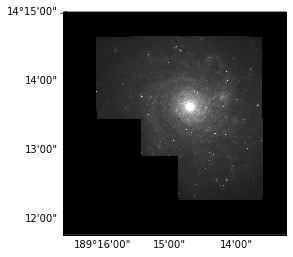

In [16]:
ax = plt.subplot(111, projection=wcs)
ax.imshow(hdulist[0].data, cmap='gray', vmax=1000, interpolation=None, origin='lower')

This image now has physcial labels in the native coordinate system of the image. We can see what the coordinate system and projection of this image is using the 'CTYPE' header entries we saw earlier.

In [17]:
print(hdulist[0].header['CTYPE1'], hdulist[0].header['CTYPE2'])

RA---TAN DEC--TAN


We can tell that this is in the FK5 coordinate system by the presence of a 'equinox' entry in the header:

In [18]:
hdulist[0].header['equinox']

2000.0

There is also a quick way to generate an Astropy coordinate frame from a WCS object, which confirms this diagnosis.

In [19]:
from astropy.wcs.utils import wcs_to_celestial_frame
wcs_to_celestial_frame(wcs)

<FK5 Frame (equinox=2000.0)>

for more information on the very useful `astropy.coordinates` module see http://docs.astropy.org/en/stable/coordinates/

<section class="objectives panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Add some labels </h2>
</div>
<br/>
Now we have a nice plot with physically meaningful ticks, we should label our axes.
<br/>

Add labels to the axes saying "Right Ascension [degrees]" and "Declination [degrees]"
<br/>

Also overlay a coordinate grid using:
<code>ax.coords.grid()</code>
Look up the documentation for this method to see what parameters you can specify.
<br/>
</section>

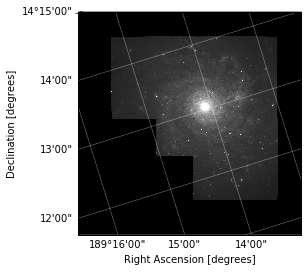

In [20]:
ax = plt.subplot(111, projection=wcs)
ax.imshow(hdulist[0].data, cmap='gray', vmax=1000, interpolation=None, origin='lower')
ax.set_xlabel("Right Ascension [degrees]")
ax.set_ylabel("Declination [degrees]")
ax.coords.grid(color='white', alpha=0.5, linestyle='solid')

## Combining WCS and wcsaxes

Now we have a nice plot, we can do a couple of things to plot.

### Overplotting in Pixel Coordinates

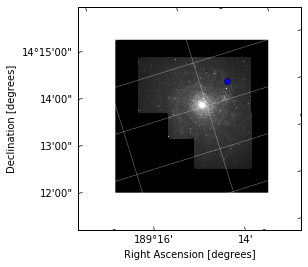

In [66]:
ax = plt.subplot(111, projection=wcs)

ax.imshow(hdulist[0].data, cmap='gray', vmax=1000, interpolation=None, origin='lower')
ax.set_xlabel("Right Ascension [degrees]")
ax.set_ylabel("Declination [degrees]")
ax.coords.grid(color='white', alpha=0.5, linestyle='solid')

ax.plot(3000, 3000, 'o')

### Overplotting in World Coordinates

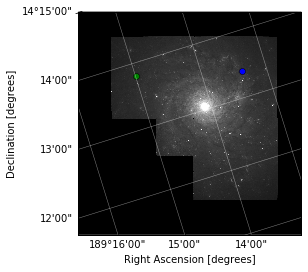

In [62]:
ax = plt.subplot(111, projection=wcs)

ax.imshow(hdulist[0].data, cmap='gray', vmax=1000, interpolation=None, origin='lower')
ax.set_xlabel("Right Ascension [degrees]")
ax.set_ylabel("Declination [degrees]")
ax.coords.grid(color='white', alpha=0.5, linestyle='solid')

ax.set_autoscale_on(False)

ax.plot(3000, 3000, 'o')
# Overplot in FK5 in Degrees
ax.plot(189.25, 14.23, 'o', transform=ax.get_transform('world'))

<section class="objectives panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Add some labels </h2>
</div>

Now overplot two lines on the image, one where you specified the line in pixel coordinates, and one where you specified the line in FK5 world coordinates.

</section>

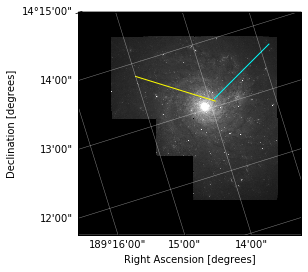

In [65]:
ax = plt.subplot(111, projection=wcs)

ax.imshow(hdulist[0].data, cmap='gray', vmax=1000, interpolation=None, origin='lower')
ax.set_xlabel("Right Ascension [degrees]")
ax.set_ylabel("Declination [degrees]")
ax.coords.grid(color='white', alpha=0.5, linestyle='solid')
ax.set_autoscale_on(False)

ax.plot([2500, 3500], [2500,3500], 'cyan')
# Overplot in FK5 in Degrees
ax.plot([189.232, 189.25], [14.218, 14.23], 'yellow', transform=ax.get_transform('world'))

###  Overplotting Another Coordinate System

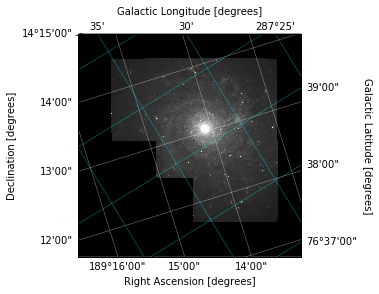

In [47]:
ax = plt.subplot(111, projection=wcs)
ax.imshow(hdulist[0].data, cmap='gray', vmax=1000, interpolation=None, origin='lower')
ax.set_xlabel("Right Ascension [degrees]")
ax.set_ylabel("Declination [degrees]")
ax.coords.grid(color='white', alpha=0.5, linestyle='solid')

overlay = ax.get_coords_overlay('galactic')
overlay.grid(color='cyan', alpha=0.5, linestyle='solid')
overlay['l'].set_axislabel("Galactic Longitude [degrees]")
overlay['b'].set_axislabel("Galactic Latitude [degrees]")

## SunPy Map

The SunPy Map class is a wrapper for solar images which makes some of the above opertations easier.

/opt/miniconda/envs/sunpy-dev/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


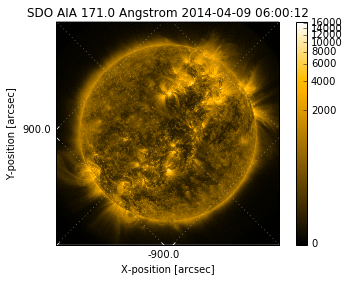

In [24]:
import sunpy.map
from sunpy.data.sample import AIA_171_ROLL_IMAGE

amap = sunpy.map.Map(AIA_171_ROLL_IMAGE)
amap.peek()

This has done a quick plot of the test image `AIA_171_ROLL_IMAGE` using wcsaxes.
If we want to customise the plot we use the `plot()` method.

In [25]:
import astropy.units as u

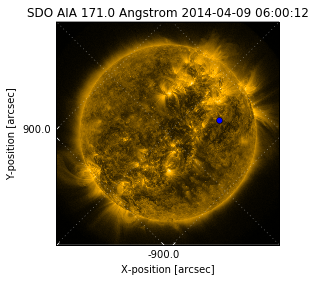

In [58]:
amap = sunpy.map.Map(AIA_171_ROLL_IMAGE)

im = amap.plot()
ax = plt.gca()
ax.set_autoscale_on(False)

x = 500*u.arcsec
y = -300*u.arcsec

ax.plot(x.to(u.deg), y.to(u.deg), 'o', transform=ax.get_transform('world'))

In [27]:
amap.pixel_to_data(100*u.pix, 200*u.pix)

(<Longitude -1610.5328521793808 arcsec>, <Latitude 44.21224760377151 arcsec>)

In [28]:
amap.data_to_pixel(0*u.arcsec, 0*u.arcsec)

(<Quantity 2052.459961000015 pix>, <Quantity 2046.880004999985 pix>)

<section class="objectives panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Rotate your Owl </h2>
</div>
Why is the Sun wonky?

Use the [`rotate()`](http://docs.sunpy.org/en/stable/code_ref/map.html#sunpy.map.mapbase.GenericMap.rotate) method of SunPy Map to align the coordinate grid to the pixel grid in this sample image.

Once you have run rotate, plot the resulting image, and compare with the one above.
</section>